In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Hyderabad.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Bawarchi,750,"Biryani,Hyderabadi,North Indian,Seafood",Hyderabad,Nallakunta,Casual Dining,"1130am to 1130pm(Mon-Sat),1130am to 12midnight...",Excellent,4.5,41344
1,Shah Ghouse Hotel & Restaurant,800,"Biryani,North Indian,Chinese,Seafood,Beverages",Hyderabad,Gachibowli,Casual Dining,12noon to 2am(Mon-Sun),Very Good,4.2,11845
2,Sahib’s Barbeque by Ohri’s,1400,"Hyderabadi,Awadhi,BBQ",Hyderabad,Hitech City,Casual Dining,"12noon to 245pm,7pm to 1130pm(Mon-Sun)",Excellent,4.7,5360
3,Captain Cook,850,"Biryani,North Indian,Chinese",Hyderabad,Musheerabad,Casual Dining,5am to 3am(Mon-Sun),Good,3.9,9080
4,The Roastery Coffee House,800,"American,Cafe,Continental",Hyderabad,Banjara Hills,Café,8am to 1130pm(Mon-Sun),Excellent,4.8,3265


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 10 columns):
Name                4226 non-null object
Price               4226 non-null int64
Cuisine_Category    4226 non-null object
City                4226 non-null object
Region              4226 non-null object
Cuisine_Type        4226 non-null object
Timing              4224 non-null object
Rating_Types        4226 non-null object
Rating              4226 non-null float64
Votes               4226 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 330.2+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,4226.000000,4226.000000,4226.000000
mean,441.075485,3.457430,237.987222
std,287.137448,0.409685,831.190747
min,50.000000,2.100000,4.000000
25%,250.000000,3.200000,20.000000
50%,350.000000,3.500000,60.000000
75%,550.000000,3.700000,213.750000
max,5000.000000,4.900000,41344.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              2
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Sri Santosh Family Dhaba    10
Sri Balaji Family Dhaba      7
Pizza Xpress                 5
Celebrations 365             5
Lassi Shop                   5
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Kukatpally       270
Gachibowli       263
Madhapur         229
Kondapur         179
Banjara Hills    132
Jubilee Hills    120
Manikonda        102
Dilsukhnagar      88
Lingampally       84
Ameerpet          78
Name: Region, dtype: int64

Text(0.5,1,'Region')

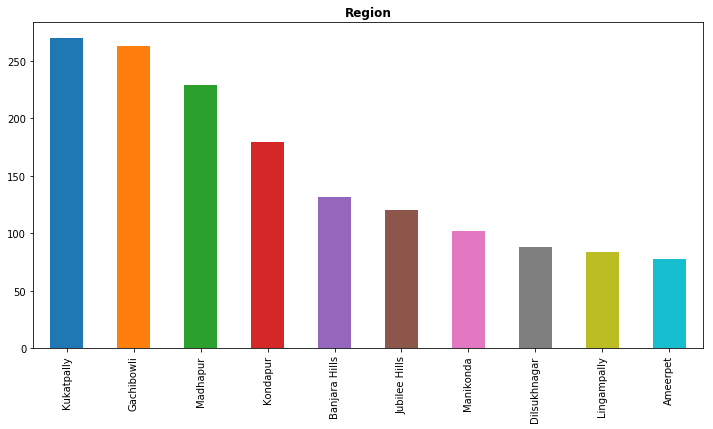

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

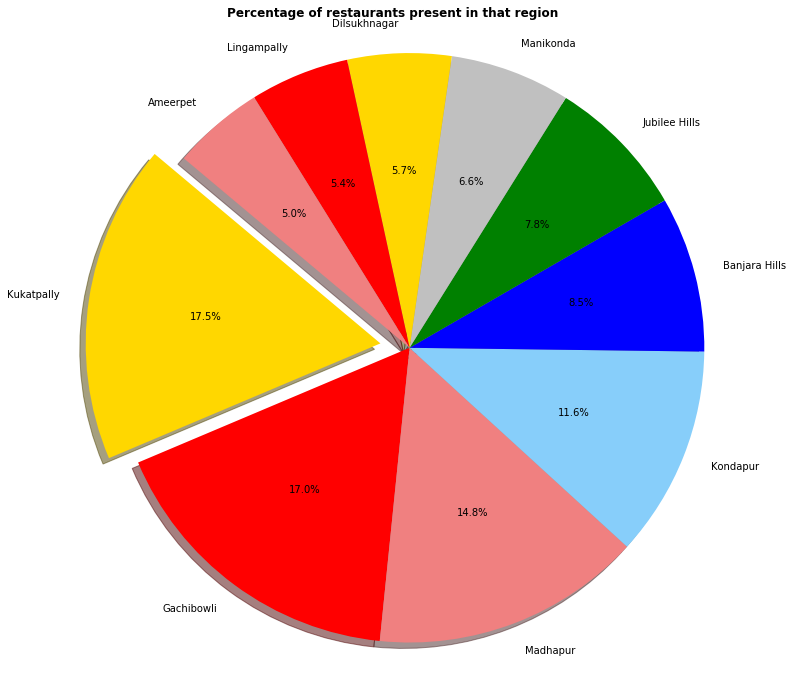

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average        2064
Good           1643
Very Good       446
Excellent        42
Poor             18
Bueno             3
Ottimo            2
İyi               2
Bom               1
Velmi dobré       1
Name: Rating_Types, dtype: int64

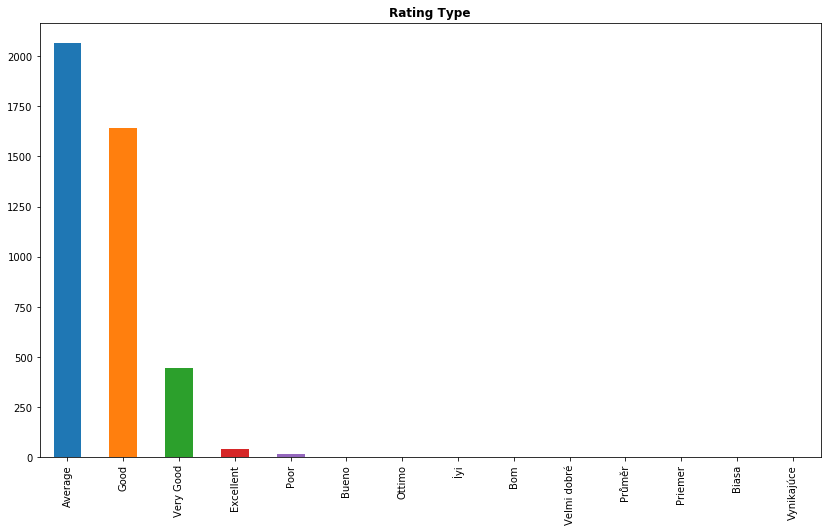

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       1878
Casual Dining     1040
none               279
Dessert Parlor     251
Bakery             224
Beverage Shop      136
Café               118
Food Court         100
Sweet Shop          53
Bar                 31
Name: Cuisine_Type, dtype: int64

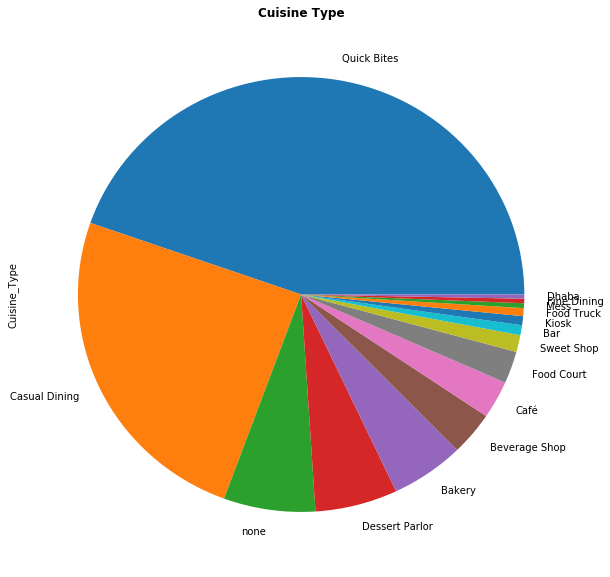

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4573626893939373


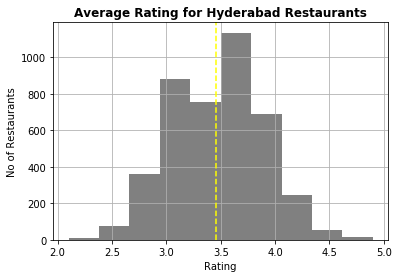

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Hyderabad Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Dehradun is found to be around 3.45

# Top cuisines in Hyderabad

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

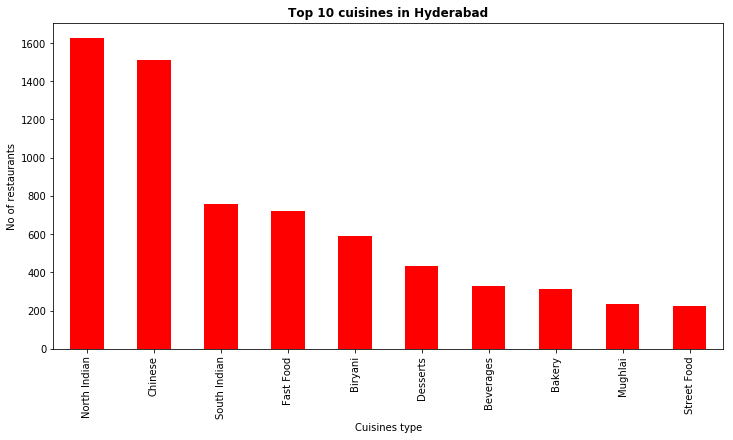

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Hyderabad',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

300     668
200     497
500     468
400     465
250     314
150     286
350     275
600     254
700     181
800     177
450     111
1000     77
100      67
550      62
900      54
750      50
650      46
1200     38
1100     23
850      22
Name: Price, dtype: int64

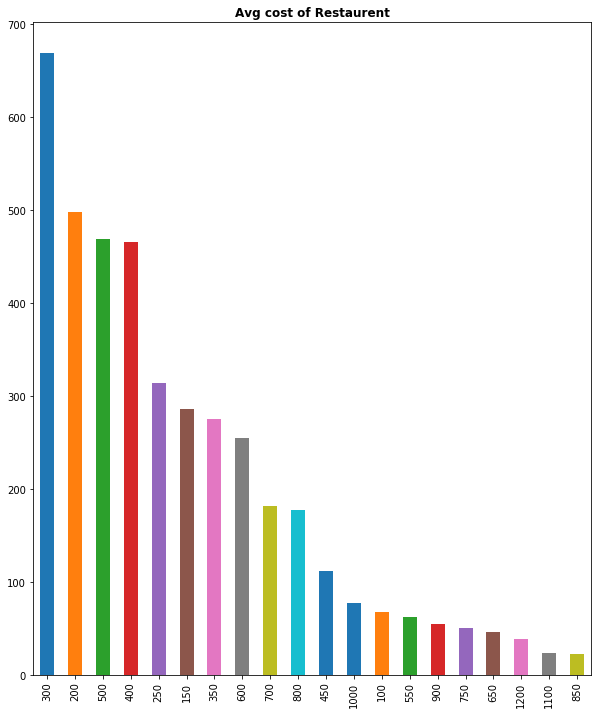

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

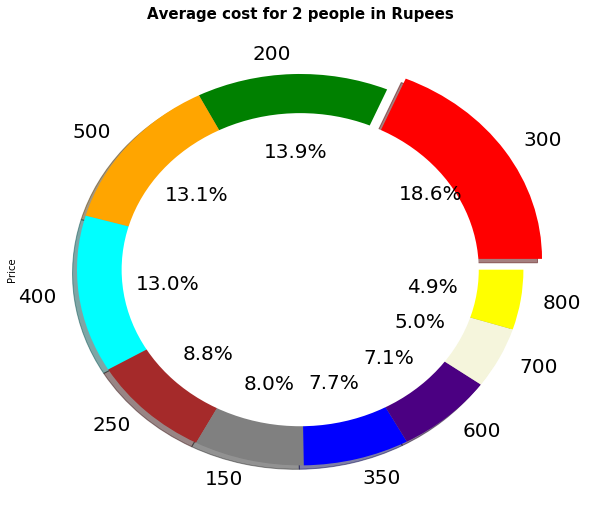

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300